In [1]:
import pandas as pd
import numpy as np

In [2]:
year='2018'
df=pd.read_csv(f'/Users/pookansmacbookpro/Documents/CEDT Computer Engineering/Sem1_2024/2110403_DataSci/Project/ExtractedData/{year}.csv')
df=df.head(30)
df['Author']

0                            Pongpirul K.; Lungren M.P.
1                           Pratumsiri T.; Janpugdee P.
2     Phuakpunk K.; Chalermsinsuwan B.; Putivisutisa...
3     Saengkaew J.; Le D.; Samart C.; Sawada H.; Nis...
4     Teengam P.; Siangproh W.; Tuantranont A.; Vila...
5                                        Setamanit S.O.
6     Chongsrisawat V.; Damrongphol P.; Ittiwut C.; ...
7                Johnstone C.; Ghia A.J.; Prayongrat A.
8              Kowsrihawat K.; Vateekul P.; Boonkwan P.
9                    Pitakchatwong C.; Chirachanchai S.
10          Zhang S.; Qin J.; Yang C.; Zhang X.; Liu R.
11                           Ketpupong P.; Piromsopa K.
12     Akkaradamrongrat S.; Kachamas P.; Sinthupinyo S.
13    Roy N.; Bundy K.; Cheung E.; Rujopakarn W.; Ca...
14                               Visetnoi S.; Nelles W.
15                                            Kidyoo M.
16    Laverock J.; Jovic V.; Zakharov A.; Niu Y.; Ki...
17     Zhang M.; Qin J.; Rajendran S.; Zhang X.;

In [3]:
from collections import defaultdict

# Create a dictionary to count co-authorships
coauthorships = defaultdict(int)

# Loop through each paper's authors
for authors in df['Author']:
    # Split authors by semicolon
    author_list = [author.strip() for author in authors.split(';')]
    
    # Only proceed if the author list has 5 or more authors
    if len(author_list) >= 5:
        # For each pair of authors, create a co-authorship edge
        for i in range(len(author_list)):
            for j in range(i + 1, len(author_list)):
                pair = tuple(sorted([author_list[i], author_list[j]]))
                coauthorships[pair] += 1

# Sort the co-authorships by count in descending order and get top 10
top_coauthors = sorted(coauthorships.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_coauthors)


[(('Qin J.', 'Zhang X.'), 2), (('Liu R.', 'Qin J.'), 2), (('Liu R.', 'Zhang X.'), 2), (('Le D.', 'Saengkaew J.'), 1), (('Saengkaew J.', 'Samart C.'), 1), (('Saengkaew J.', 'Sawada H.'), 1), (('Nishida M.', 'Saengkaew J.'), 1), (('Chanlek N.', 'Saengkaew J.'), 1), (('Kongparakul S.', 'Saengkaew J.'), 1), (('Kiatkamjornwong S.', 'Saengkaew J.'), 1)]


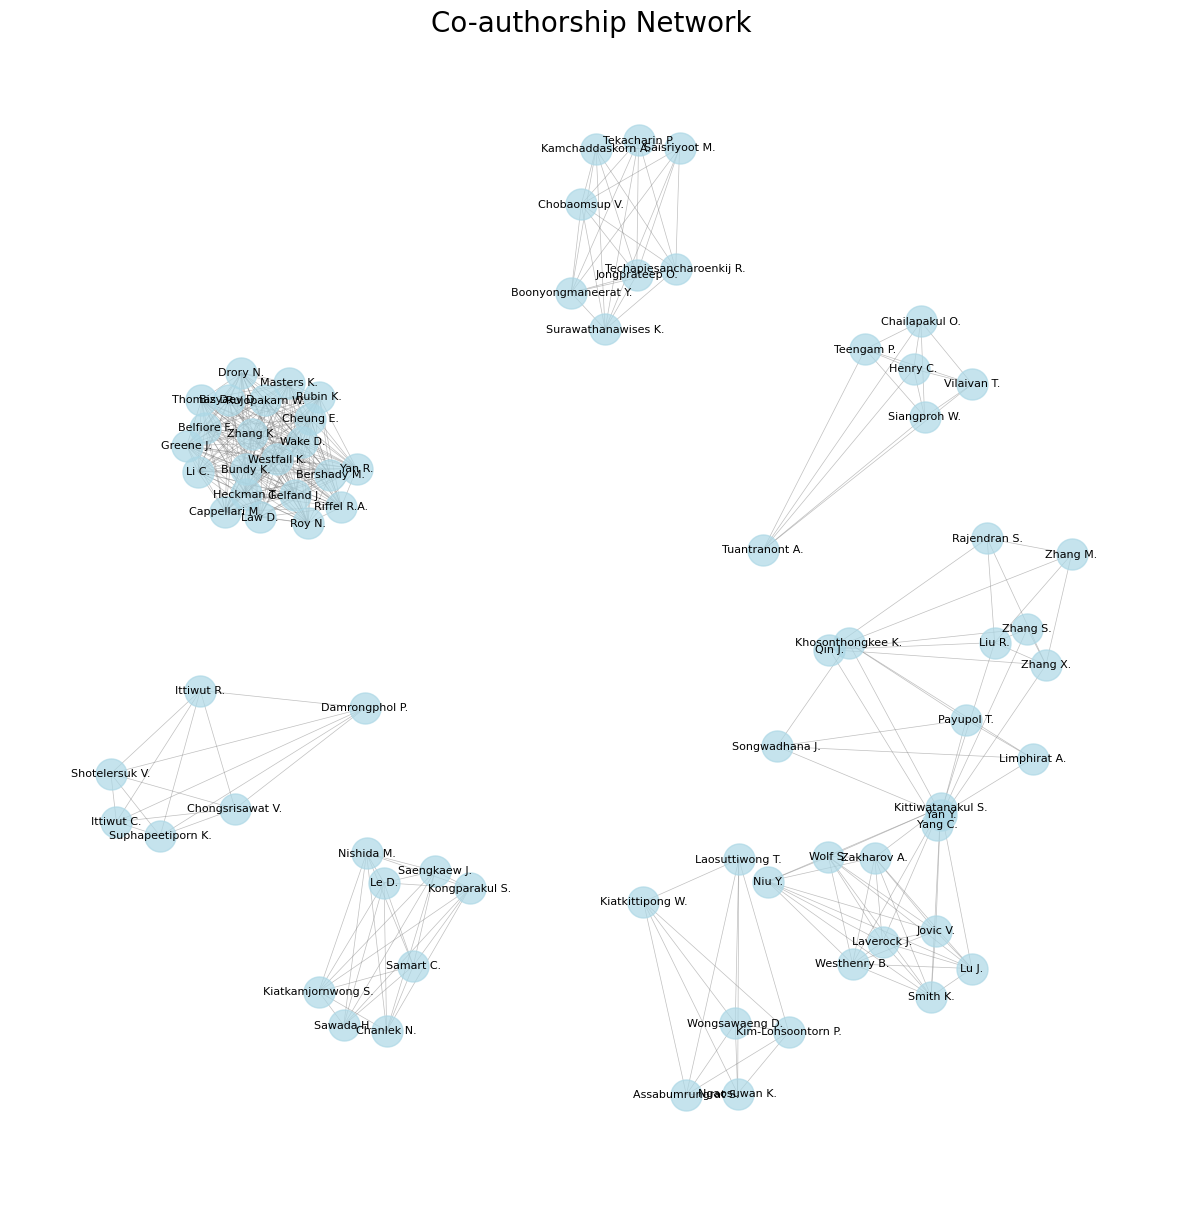

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph
G = nx.Graph()

for pair, count in coauthorships.items():
    G.add_edge(pair[0], pair[1], weight=count)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=1, iterations=100)

nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

plt.title("Co-authorship Network", fontsize=20)
plt.axis('off')
plt.show()